<a href="https://colab.research.google.com/github/YusrilMaqoshidana/google-collab/blob/coba/coba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import pacakage

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Membuka file

In [9]:
df = pd.read_csv("cardata.csv")
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [6]:
df.dtypes

,0
Car_Name,object
Year,int64
Selling_Price,float64
Present_Price,float64
Kms_Driven,int64
Fuel_Type,object
Seller_Type,object
Transmission,object
Owner,int64


In [ ]:
df = df.drop(['Fuel_Type', 'Owner'], axis=1)

In [14]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission
0,ritz,2014,3.35,5.59,27000,Dealer,Manual
1,sx4,2013,4.75,9.54,43000,Dealer,Manual
2,ciaz,2017,7.25,9.85,6900,Dealer,Manual
3,wagon r,2011,2.85,4.15,5200,Dealer,Manual
4,swift,2014,4.60,6.87,42450,Dealer,Manual
5,vitara brezza,2018,9.25,9.83,2071,Dealer,Manual
6,ciaz,2015,6.75,8.12,18796,Dealer,Manual
7,s cross,2015,6.50,8.61,33429,Dealer,Manual
8,ciaz,2016,8.75,8.89,20273,Dealer,Manual
9,ciaz,2015,7.45,8.92,42367,Dealer,Manual


In [24]:
df = df.rename(columns={'HP':'Kms_Driven'})
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission
0,ritz,2014,3.35,5.59,27000,Dealer,Manual
1,sx4,2013,4.75,9.54,43000,Dealer,Manual
2,ciaz,2017,7.25,9.85,6900,Dealer,Manual
3,wagon r,2011,2.85,4.15,5200,Dealer,Manual
4,swift,2014,4.60,6.87,42450,Dealer,Manual


In [18]:
df.shape

(301, 7)

In [17]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)
df.count()

number of duplicate rows:  (2, 7)


,0
Car_Name,301
Year,301
Selling_Price,301
Present_Price,301
HP,301
Seller_Type,301
Transmission,301


In [19]:
df = df.drop_duplicates()
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,HP,Seller_Type,Transmission
0,ritz,2014,3.35,5.59,27000,Dealer,Manual
1,sx4,2013,4.75,9.54,43000,Dealer,Manual
2,ciaz,2017,7.25,9.85,6900,Dealer,Manual
3,wagon r,2011,2.85,4.15,5200,Dealer,Manual
4,swift,2014,4.60,6.87,42450,Dealer,Manual
5,vitara brezza,2018,9.25,9.83,2071,Dealer,Manual
6,ciaz,2015,6.75,8.12,18796,Dealer,Manual
7,s cross,2015,6.50,8.61,33429,Dealer,Manual
8,ciaz,2016,8.75,8.89,20273,Dealer,Manual
9,ciaz,2015,7.45,8.92,42367,Dealer,Manual


In [20]:
df.count()

,0
Car_Name,299
Year,299
Selling_Price,299
Present_Price,299
HP,299
Seller_Type,299
Transmission,299


In [21]:
print(df.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
HP               0
Seller_Type      0
Transmission     0
dtype: int64


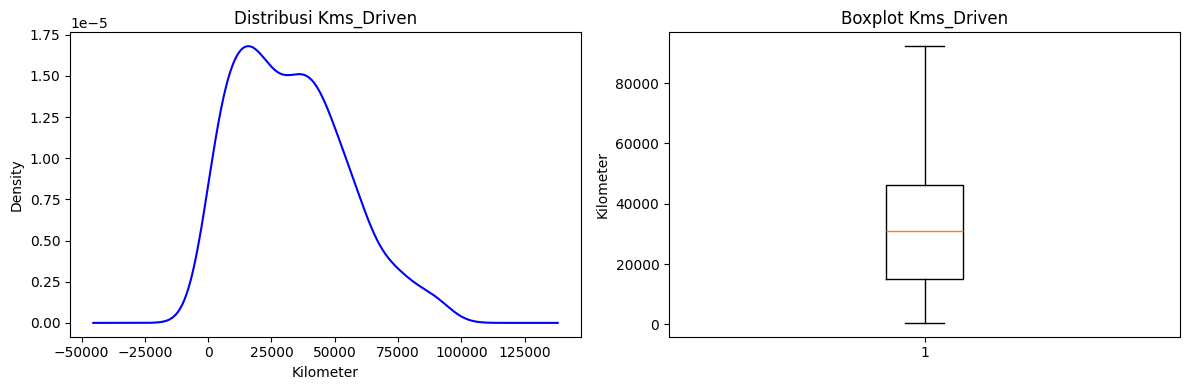

In [32]:
import matplotlib.pyplot as plt

# Membuat figur dengan ukuran 12x4
fig = plt.figure(figsize=(12, 4))

# Plot distribusi (KDE) dari Kms_Driven
ax1 = fig.add_subplot(1, 2, 1)
df['Kms_Driven'].plot(kind='kde', ax=ax1, color='blue')
ax1.set_title('Distribusi Kms_Driven')
ax1.set_xlabel('Kilometer')
ax1.set_ylabel('Density')

# Plot boxplot dari Kms_Driven
ax2 = fig.add_subplot(1, 2, 2)
ax2.boxplot(df['Kms_Driven'], vert=True)
ax2.set_title('Boxplot Kms_Driven')
ax2.set_ylabel('Kilometer')

# Tampilkan grafik
plt.tight_layout()
plt.show()


In [31]:
Q1 = df['Kms_Driven'].quantile(0.25)
Q3 = df['Kms_Driven'].quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# filter agar hanya data yang masuk akal
df = df[(df['Kms_Driven'] >= batas_bawah) & (df['Kms_Driven'] <= batas_atas)]
df.count()

,0
Car_Name,291
Year,291
Selling_Price,291
Present_Price,291
Kms_Driven,291
Seller_Type,291
Transmission,291


In [33]:
df.Selling_Price.describe()

,Selling_Price
count,291.000000
mean,4.581031
std,4.946487
min,0.100000
25%,0.900000
50%,3.650000
75%,6.000000
max,35.000000


<Axes: xlabel='Selling_Price'>

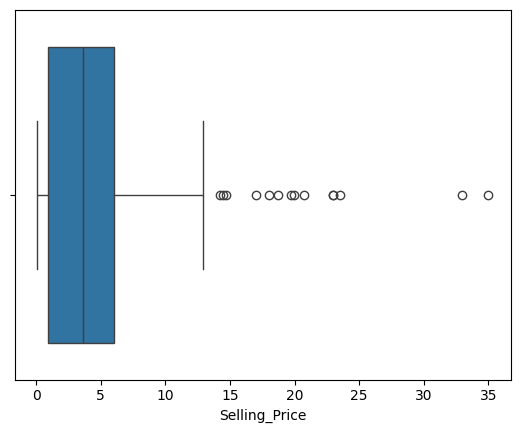

In [34]:
sns.boxplot(x=df['Selling_Price'])